In [108]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
# Load the dataset
df=pd.read_csv('winequality-white.csv')



In [110]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [111]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [112]:
# Check missing values
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [113]:

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [114]:

df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [115]:
df = df.drop('free sulfur dioxide', axis=1, errors='ignore')


In [116]:
# One-hot encode categorical variables
df = pd.get_dummies(df)

In [117]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [118]:
# Grouping by alcohol and calculating average quality
import matplotlib.pyplot as plt


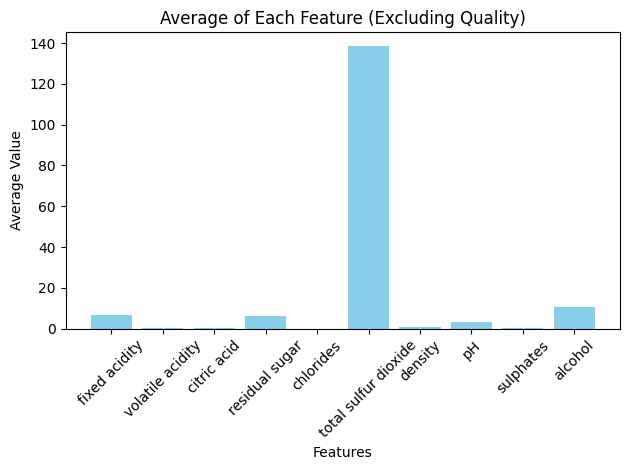

In [119]:
# Plotting as bar chart
# Calculate the mean of each feature except 'quality'
x = df.drop('quality', axis=1).columns  # Feature names
y = df.drop('quality', axis=1).mean()   # Average value for each feature

# Plot
plt.bar(x, y, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.title('Average of Each Feature (Excluding Quality)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [120]:
X = df.drop('quality', axis=1)  # Features (independent variables)
y = df['quality']               # Loan Status(dependent variable)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [123]:
y_pred = model.predict(X_test)


In [124]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted')  # or 'macro', 'micro' depending on your goal
print("Precision:", precision)

Precision: 0.6252430057606385


In [125]:
#Calculate precision
precision = precision_score(y_test, y_pred,average='weighted')
print("Precision:", precision)
# Calculate recall
recall = recall_score(y_test, y_pred,average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 Score:", f1)


Precision: 0.6252430057606385
Recall: 0.6173469387755102
F1 Score: 0.6207729291828675


In [126]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Output the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 61.73%
Confusion Matrix:
[[  0   0   2   2   1   0]
 [  1   9   8   3   4   0]
 [  2  14 189  77   8   1]
 [  1   4  79 279  53  16]
 [  4   1   4  55 112  16]
 [  0   1   1   9   8  16]]


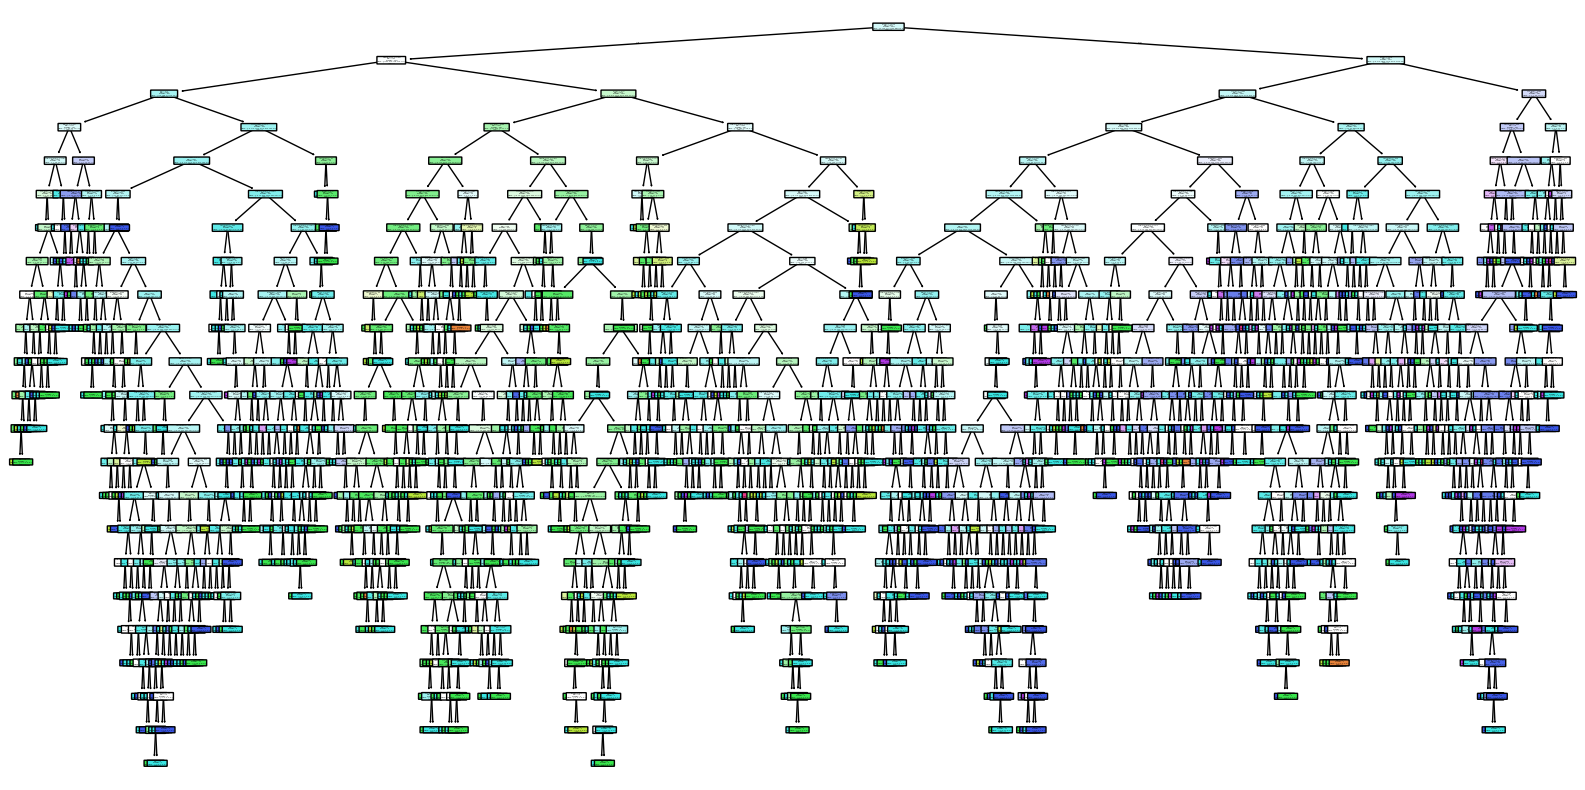

In [127]:
# Step 7: Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    model,
    filled=True,
    feature_names=X.columns,  
    class_names=[str(c) for c in y.unique()],
    rounded=True
)

plt.show()
